In [3]:
import xarray as xr
import numpy as np

In [7]:
era = xr.open_mfdataset('./era_201*.nc')
era = era.sel(time=slice('2017'))


In [8]:
era = era.where(era.latitude >= 17, drop=True)
era = era.where(era.latitude <= 33, drop=True)
era = era.where(era.longitude >= 260, drop=True)
era = era.where(era.longitude <= 280, drop=True)
era['WS_10'] = np.sqrt(era.u10**2+era.v10**2)


#Interpolacion a 119m
era['WS_119'] = era['WS_10']*((119/10)**0.11)


###### Datos a 119m
#era_ws_119 = np.asarray(era.WS_119)

In [16]:
era_ws_119 = np.asarray(era.WS_119)

In [22]:
era.close()

In [18]:
era_ws_119.shape

(8760, 65, 81)

In [23]:
#Definir curva
velocidades = np.linspace(0,28,29)
power = [0, 0, 0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1, 10648.5, 10639.3, 10683.7, 10642.0, 10640.0, 10639.9, 10652.8, 10646.2, 10644.0, 10641.2, 10639.5, 10643.6, 10635.7, 0, 0, 0]

fpt1 = np.poly1d(np.polyfit(np.linspace(2, 12, 11),[0, 0, 280.2, 799.1, 1532.7, 2506.1, 3730.7, 5311.8, 7286.5, 9698.3, 10639.1], deg = 6))

def curva_aero(data):
    vel_turb = []
    for i in data:
        if i < 4:
            vel_turb.append(0)
        elif i >= 4 and i < 11.7:
            vel_turb.append(fpt1(i))
        elif i >=11.7 and i <= 25:
            vel_turb.append(10640)
        else:
            vel_turb.append(0)
    return(vel_turb)



In [24]:
#Evaluar curva
potencia = []
for i in range(65):
    for j in range(81):
        potencia.append(sum(curva_aero(era_ws_119[:,i,j])))
        print(i,j)   # Esta linea existe para monitorear cómo va todo, tal vez para pocos años pueda ser
                    #mas perjudicial porque podría tardar mas imprimiendo que calculando



0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43


18 75
18 76
18 77
18 78
18 79
18 80
19 0
19 1
19 2
19 3
19 4
19 5
19 6
19 7
19 8
19 9
19 10
19 11
19 12
19 13
19 14
19 15
19 16
19 17
19 18
19 19
19 20
19 21
19 22
19 23
19 24
19 25
19 26
19 27
19 28
19 29
19 30
19 31
19 32
19 33
19 34
19 35
19 36
19 37
19 38
19 39
19 40
19 41
19 42
19 43
19 44
19 45
19 46
19 47
19 48
19 49
19 50
19 51
19 52
19 53
19 54
19 55
19 56
19 57
19 58
19 59
19 60
19 61
19 62
19 63
19 64
19 65
19 66
19 67
19 68
19 69
19 70
19 71
19 72
19 73
19 74
19 75
19 76
19 77
19 78
19 79
19 80
20 0
20 1
20 2
20 3
20 4
20 5
20 6
20 7
20 8
20 9
20 10
20 11
20 12
20 13
20 14
20 15
20 16
20 17
20 18
20 19
20 20
20 21
20 22
20 23
20 24
20 25
20 26
20 27
20 28
20 29
20 30
20 31
20 32
20 33
20 34
20 35
20 36
20 37
20 38
20 39
20 40
20 41
20 42
20 43
20 44
20 45
20 46
20 47
20 48
20 49
20 50
20 51
20 52
20 53
20 54
20 55
20 56
20 57
20 58
20 59
20 60
20 61
20 62
20 63
20 64
20 65
20 66
20 67
20 68
20 69
20 70
20 71
20 72
20 73
20 74
20 75
20 76
20 77
20 78
20 79
20 80
21 0
21 1
21

36 13
36 14
36 15
36 16
36 17
36 18
36 19
36 20
36 21
36 22
36 23
36 24
36 25
36 26
36 27
36 28
36 29
36 30
36 31
36 32
36 33
36 34
36 35
36 36
36 37
36 38
36 39
36 40
36 41
36 42
36 43
36 44
36 45
36 46
36 47
36 48
36 49
36 50
36 51
36 52
36 53
36 54
36 55
36 56
36 57
36 58
36 59
36 60
36 61
36 62
36 63
36 64
36 65
36 66
36 67
36 68
36 69
36 70
36 71
36 72
36 73
36 74
36 75
36 76
36 77
36 78
36 79
36 80
37 0
37 1
37 2
37 3
37 4
37 5
37 6
37 7
37 8
37 9
37 10
37 11
37 12
37 13
37 14
37 15
37 16
37 17
37 18
37 19
37 20
37 21
37 22
37 23
37 24
37 25
37 26
37 27
37 28
37 29
37 30
37 31
37 32
37 33
37 34
37 35
37 36
37 37
37 38
37 39
37 40
37 41
37 42
37 43
37 44
37 45
37 46
37 47
37 48
37 49
37 50
37 51
37 52
37 53
37 54
37 55
37 56
37 57
37 58
37 59
37 60
37 61
37 62
37 63
37 64
37 65
37 66
37 67
37 68
37 69
37 70
37 71
37 72
37 73
37 74
37 75
37 76
37 77
37 78
37 79
37 80
38 0
38 1
38 2
38 3
38 4
38 5
38 6
38 7
38 8
38 9
38 10
38 11
38 12
38 13
38 14
38 15
38 16
38 17
38 18
38 19
38 20


53 30
53 31
53 32
53 33
53 34
53 35
53 36
53 37
53 38
53 39
53 40
53 41
53 42
53 43
53 44
53 45
53 46
53 47
53 48
53 49
53 50
53 51
53 52
53 53
53 54
53 55
53 56
53 57
53 58
53 59
53 60
53 61
53 62
53 63
53 64
53 65
53 66
53 67
53 68
53 69
53 70
53 71
53 72
53 73
53 74
53 75
53 76
53 77
53 78
53 79
53 80
54 0
54 1
54 2
54 3
54 4
54 5
54 6
54 7
54 8
54 9
54 10
54 11
54 12
54 13
54 14
54 15
54 16
54 17
54 18
54 19
54 20
54 21
54 22
54 23
54 24
54 25
54 26
54 27
54 28
54 29
54 30
54 31
54 32
54 33
54 34
54 35
54 36
54 37
54 38
54 39
54 40
54 41
54 42
54 43
54 44
54 45
54 46
54 47
54 48
54 49
54 50
54 51
54 52
54 53
54 54
54 55
54 56
54 57
54 58
54 59
54 60
54 61
54 62
54 63
54 64
54 65
54 66
54 67
54 68
54 69
54 70
54 71
54 72
54 73
54 74
54 75
54 76
54 77
54 78
54 79
54 80
55 0
55 1
55 2
55 3
55 4
55 5
55 6
55 7
55 8
55 9
55 10
55 11
55 12
55 13
55 14
55 15
55 16
55 17
55 18
55 19
55 20
55 21
55 22
55 23
55 24
55 25
55 26
55 27
55 28
55 29
55 30
55 31
55 32
55 33
55 34
55 35
55 36
55 37


In [27]:

potencia = np.asarray(potencia)
potencia = potencia.reshape(65,81)
np.savetxt('potencia_era_dtu_test.csv', potencia)

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.basemap import Basemap

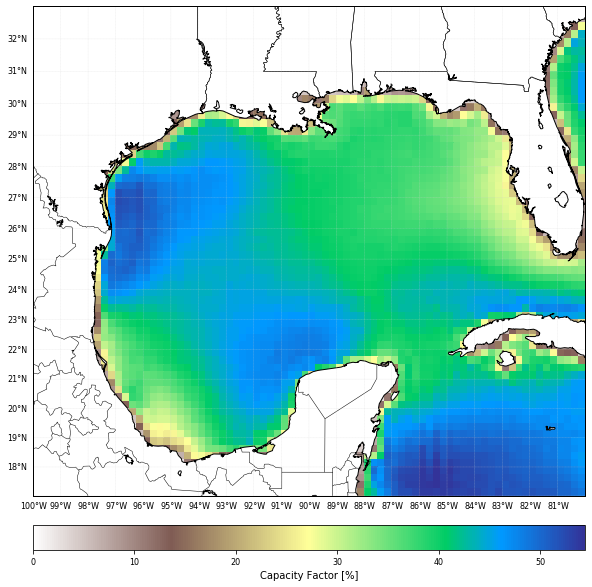

In [30]:
plt.figure(figsize=(10,10))
map = Basemap(projection='merc',llcrnrlon=-100,llcrnrlat=17,urcrnrlon=-80,urcrnrlat=33,resolution='i')
#map.fillcontinents(color='#ddaa66',lake_color='aqua')

map.drawcoastlines()
map.drawmapboundary()
map.drawcountries()
map.drawstates()
map.drawparallels(np.arange(17, 33, 1), labels=[1,0,0,0], fontsize=8, linewidth=0.3, color='lightgray')
map.drawmeridians(np.arange(-100., -80., 1), labels=[0,0,0,1], fontsize=8, linewidth=0.3, color='lightgray')

    
##############
#Wind
file = np.loadtxt('potencia_era_dtu_test.csv')
file = file/(10640*365*24)*100
#file[file<30]=np.nan

lons = np.loadtxt('era_lon.csv')-360
lats = np.loadtxt('era_lat.csv')
lon, lat = np.meshgrid(lons, lats)
xi, yi = map(lon, lat)
cs = map.pcolormesh(xi,yi,file, cmap=cm.terrain_r)
#map.fillcontinents(color = 'bisque')
# Add Colorbar
cbar = map.colorbar(cs, location='bottom', pad="6%")
cbar.set_label('Capacity Factor [%]')
cbar.ax.tick_params(labelsize=8)

# x,y = map(-98.563,24.287)
# plt.text(x,y,'Tamaulipas',horizontalalignment='center', color='r', fontsize=12)

# x,y = map(-89.125,19.5)
# plt.text(x,y,'Yucatan Peninsula',horizontalalignment='center', color='r', fontsize=12)

map.fillcontinents(color='white')
#plt.title('ERA5 and DTU Wind Turbine', fontsize = 12)
plt.show()